In [1]:
import torch
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# 加载特征
feats_list = torch.load('logs/dinov2_backbone_dinov2_large/lightning_logs/version_0/feats_list.pth')
feats_num = len(feats_list)
print(feats_num)

print(len(feats_list[0]))

steps=[10, 100, 1000]

all_feats_change = []
for j in range(len(feats_list[0])): # 遍历每个特征
    feats_change = []
    for step in steps:
        tmp_feats_change = []
        for i in range(0,feats_num-step):
            current_feats = feats_list[i][j]
            next_feats = feats_list[i+step][j]
            # 计算特征变化, 使用欧氏距离
            distance = torch.norm(current_feats - next_feats, p=2)
            tmp_feats_change.append(distance)
        feats_change.append(tmp_feats_change)
    all_feats_change.append(feats_change)  

19540
4


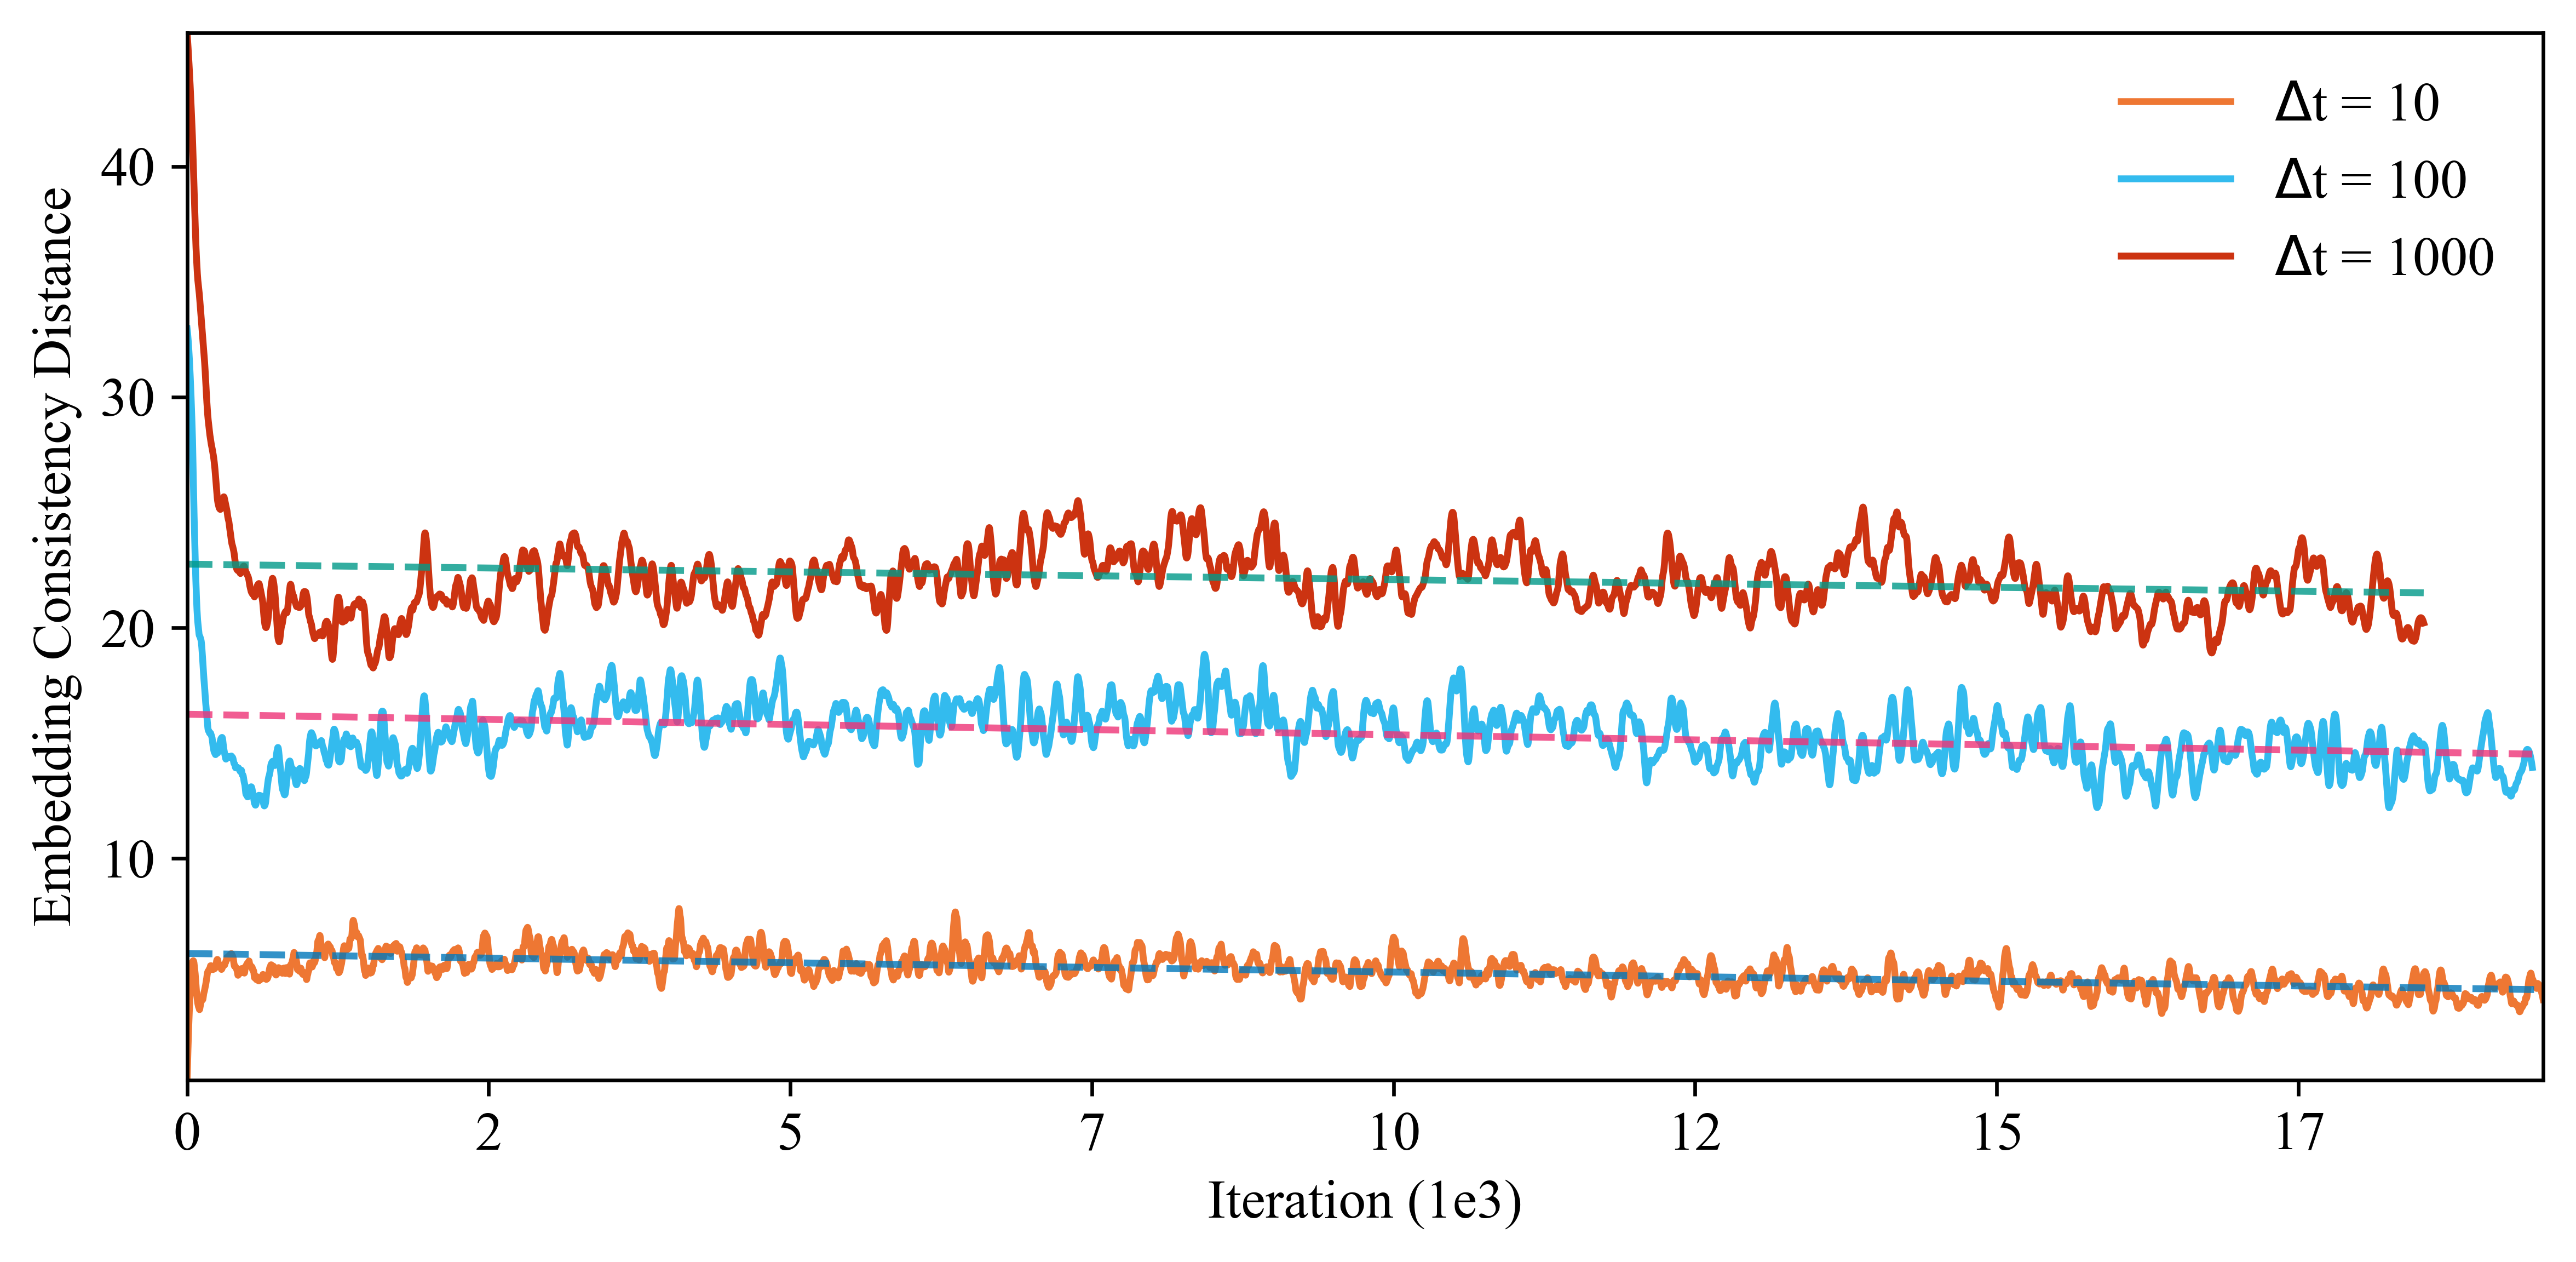

In [3]:
# 遍历每个特征，将不同step的特征变化绘制在一张图上
# 创建一个figure，将all_feats_change中的四个元素绘制在一张图的子图上，两行两列
import scienceplots
import numpy as np
plt.style.use(['ieee','vibrant'])
# 设置全局字体和大小
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

#创建一个字典来存储要保存的数据
# 创建一个DataFrame用于保存数据
import pandas as pd
df_dict = {}

fig, ax = plt.subplots(1, 1, figsize=(8, 4))  # 修改为单个子图

# 只遍历第一个特征
idx = 0
feats_change = all_feats_change[idx]
for i in range(len(feats_change)):
    change = feats_change[i]
    window_length = min(91, len(change) - (1 - len(change) % 2))
    smoothed_change = savgol_filter(change, window_length, 2)

    # 将数据添加到字典中，使用索引作为键
    column_name = f'instance{idx+1}_step{steps[i]}'
    df_dict[column_name] = pd.Series(smoothed_change.tolist())
    
    # 添加原始曲线
    ax.plot(smoothed_change, label=f'$\Delta$t = {steps[i]}')
    
    # 计算并添加趋势线，但不添加标签
    x = np.arange(len(smoothed_change))
    z = np.polyfit(x, smoothed_change, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), '--', alpha=0.8)

# 设置x轴刻度为千单位
ax.set_xticks(ax.get_xticks())  # 先获取当前刻度
ax.set_xticklabels([f'{int(x/1000)}' for x in ax.get_xticks()])

ax.set_xlabel('Iteration (1e3)')
ax.set_ylabel('Embedding Consistency Distance')
ax.legend(frameon=False)
ax.autoscale(tight=True)
    
# 将数据保存到CSV文件
import pandas as pd
df = pd.DataFrame(df_dict)
df.to_csv('some_result_images/feats_change/feats_change_data.csv', index=True, index_label='iteration')

plt.tight_layout()
# plt.savefig('some_result_images/feats_change/feats_change_instance_v1.png', bbox_inches='tight', dpi=600)
plt.show()


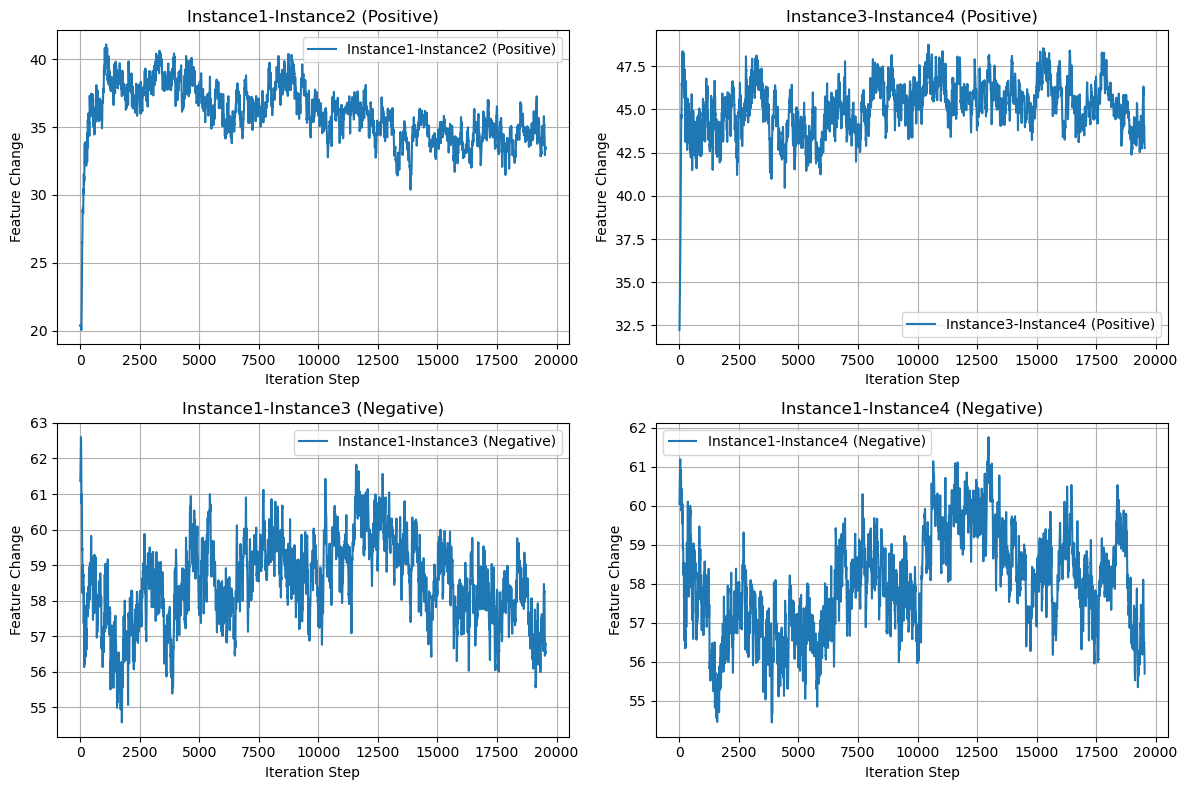

In [13]:
instance1, instance2, instance3, instance4 = [], [], [], []
for i in range(len(feats_list)):
    instance1.append(feats_list[i][0])
    instance2.append(feats_list[i][1])
    instance3.append(feats_list[i][2])
    instance4.append(feats_list[i][3])

# 计算instance1和instance2的欧氏距离
instance1_instance2_distance = []
for i in range(len(instance1)):
    distance = torch.norm(instance1[i] - instance2[i], p=2)
    instance1_instance2_distance.append(distance)

# 计算instance3和instance4的欧氏距离
instance3_instance4_distance = []
for i in range(len(instance3)):
    distance = torch.norm(instance3[i] - instance4[i], p=2)
    instance3_instance4_distance.append(distance)

# 计算instance1和instance3的欧氏距离
instance1_instance3_distance = []
for i in range(len(instance1)):
    distance = torch.norm(instance1[i] - instance3[i], p=2)
    instance1_instance3_distance.append(distance)

# 计算instance1和instance4的欧氏距离
instance1_instance4_distance = []
for i in range(len(instance1)):
    distance = torch.norm(instance1[i] - instance4[i], p=2)
    instance1_instance4_distance.append(distance)


fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].plot(instance1_instance2_distance, label=f'Instance1-Instance2 (Positive)')
axs[0, 0].set_title(f'Instance1-Instance2 (Positive)')
axs[0, 0].set_xlabel('Iteration Step')
axs[0, 0].set_ylabel('Feature Change')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(instance3_instance4_distance, label=f'Instance3-Instance4 (Positive)')
axs[0, 1].set_title(f'Instance3-Instance4 (Positive)')
axs[0, 1].set_xlabel('Iteration Step')
axs[0, 1].set_ylabel('Feature Change')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].plot(instance1_instance3_distance, label=f'Instance1-Instance3 (Negative)')
axs[1, 0].set_title(f'Instance1-Instance3 (Negative)')
axs[1, 0].set_xlabel('Iteration Step')
axs[1, 0].set_ylabel('Feature Change')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(instance1_instance4_distance, label=f'Instance1-Instance4 (Negative)')
axs[1, 1].set_title(f'Instance1-Instance4 (Negative)')
axs[1, 1].set_xlabel('Iteration Step')
axs[1, 1].set_ylabel('Feature Change')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()

plt.savefig('some_result_images/feats_change/feats_change_instance_v1.png', dpi=600, bbox_inches='tight')
plt.show()
